In [1]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas.api.types import is_list_like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as data

In [2]:
from sklearn import mixture as mix

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import talib as ta
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [4]:
#import sklearn
#print (sklearn.__version__)

In [62]:
end = dt.date.today()
start = dt.datetime(end.year-5,end.month,end.day)
df = pd.DataFrame(data.DataReader('BSE/BOM500875', 'quandl', start=start, end=end ))  #Maruti Ltd.
df

,Open,High,Low,Close,WAP,NoofShares,NoofTrades,TotalTurnover,DeliverableQuantity,DeliQtytoTradedQty,SpreadHL,SpreadCO
Date,,,,,,,,,,,,
2019-03-01,277.00,278.65,276.10,277.80,277.180000,689752.0,4140.0,1.911884e+08,326037.0,47.27,2.55,0.80
2019-02-28,276.70,276.90,274.35,276.15,275.680000,480004.0,2937.0,1.323289e+08,262530.0,54.69,2.55,-0.55
2019-02-27,276.50,278.75,273.85,275.05,275.690000,480774.0,3126.0,1.325468e+08,197216.0,41.02,4.90,-1.45
2019-02-26,276.00,276.75,274.05,274.95,275.590000,544201.0,2800.0,1.499747e+08,262546.0,48.24,2.70,-1.05
2019-02-25,275.00,277.20,273.30,276.75,275.920000,497360.0,2951.0,1.372315e+08,215215.0,43.27,3.90,1.75
2019-02-22,276.00,276.00,273.25,274.30,274.160000,774462.0,5115.0,2.123235e+08,203016.0,26.21,2.75,-1.70
2019-02-21,276.00,277.00,274.10,274.90,274.950000,375657.0,3092.0,1.032862e+08,199263.0,53.04,2.90,-1.10
2019-02-20,277.50,278.40,274.00,275.85,275.130000,441211.0,3625.0,1.213921e+08,199259.0,45.16,4.40,-1.65
2019-02-19,274.15,278.75,274.00,275.10,276.750000,294348.0,3340.0,8.145966e+07,89286.0,30.33,4.75,0.95


In [63]:
df = df[['Open', 'High', 'Low', 'Close']]
df.describe()

,Open,High,Low,Close
count,1232.000000,1232.000000,1232.000000,1232.000000
mean,303.363758,306.207955,299.836526,302.874513
std,39.719158,40.223824,39.115677,39.807290
min,224.000000,225.000000,222.050000,223.600000
25%,270.000000,272.000000,267.425000,269.562500
50%,302.500000,305.725000,299.000000,301.675000
75%,336.487500,339.400000,333.137500,336.562500
max,398.700000,409.700000,393.450000,399.550000


In [64]:
#Spliting the data 80% for testing and 20% for training
n = 10
t = 0.8
split = int(t*len(df))
print(split)

985


In [65]:
# print(df['High'][:split])
# print(df['High'].shift(1))
#I created various technical indicators such as, RSI, SMA, ADX, Correlation, 
#Parabolic SAR, and the Return of the past 1- day on an Open to Open basis.

# df['High'] = df['High'].shift(1)
# df['Low'] = df['Low'].shift(1)
# df['Close'] = df['Close'].shift(1)
df['RSI']= ta.RSI(np.array(df['Close']), timeperiod=n)
df['SMA']= df['Close'].rolling(window=n).mean()
df['Corr']= df['SMA'].rolling(window=n).corr(df['Close'])
df['SAR']= ta.SAR(np.array(df['High']),np.array(df['Low']),0.2,0.2)
df['ADX']= ta.ADX(np.array(df['High']),np.array(df['Low']),np.array(df['Close']), timeperiod=n)
df['Return']= np.log(df['Open']/df['Open'].shift(1))

df = df.dropna()
df


c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Open,High,Low,Close,RSI,SMA,Corr,SAR,ADX,Return
Date,,,,,,,,,,
2019-02-04,281.70,281.70,276.20,276.90,48.924730,277.195,-0.243533,272.850000,28.282067,0.016103
2019-02-01,280.00,284.90,279.25,280.80,57.908317,277.315,0.316458,272.850000,27.785638,-0.006053
2019-01-31,277.40,279.50,273.70,278.75,52.513724,277.400,0.475632,284.900000,25.595778,-0.009329
2019-01-30,280.00,280.30,273.75,274.80,43.781765,277.170,0.358452,284.900000,23.237951,0.009329
2019-01-29,276.00,279.00,274.65,278.55,52.170991,277.480,0.301190,282.660000,21.115906,-0.014389
2019-01-28,279.30,279.70,274.10,274.65,44.497829,277.200,0.306496,280.868000,19.189999,0.011886
2019-01-25,279.10,282.60,278.50,279.25,53.467083,277.540,0.325828,273.700000,18.917081,-0.000716
2019-01-24,279.45,283.30,278.05,278.90,52.746461,277.455,0.686429,274.100000,18.992055,0.001253
2019-01-23,292.00,294.30,275.00,277.70,50.170496,277.470,0.761410,294.300000,22.282704,0.043930


# Standard Scaler

c:\program files (x86)\python36-32\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


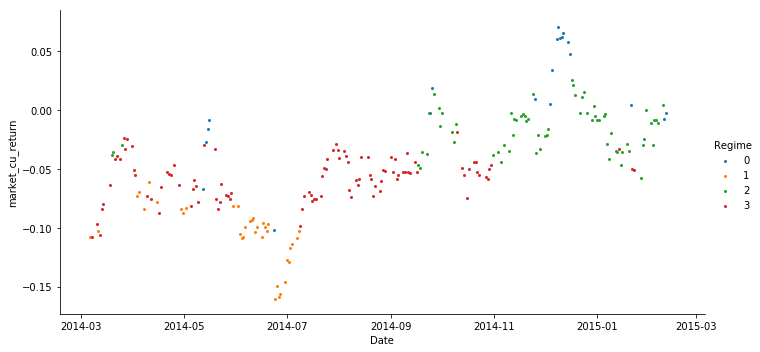

Mean for regime 0: 1.835831445558114
Co-Variance for regime 0: 1.3306230294165533
Mean for regime 1: -1.2211064366951239
Co-Variance for regime 1: 0.385692164859184
Mean for regime 2: 0.8552038934371727
Co-Variance for regime 2: 0.3830649027466161
Mean for regime 3: -0.46048571705142416
Co-Variance for regime 3: 0.36599973011252324


In [66]:
ss = StandardScaler()
unsup = mix.GaussianMixture(n_components=4,covariance_type='spherical', n_init=100, random_state=42)
#df = df.drop(['High','Low','Close'], axis=1)
unsup.fit(np.reshape(ss.fit_transform(df[:split]),(-1, df.shape[1])))
regime=unsup.predict(np.reshape(ss.fit_transform(df[split:]),(-1, df.shape[1])))
Regimes= pd.DataFrame(regime, columns=['Regime'],index=df[split:].index).join(df[split:], how='inner').assign(market_cu_return=df[split:].Return.cumsum()).reset_index(drop=False).rename(columns={'index':'Date'})

orders=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes, hue='Regime', hue_order=orders, aspect=2, size=5)
fig.map(plt.scatter, 'Date', 'market_cu_return', s=4).add_legend()
plt.show()

for i in orders:
    print("Mean for regime %i:"%i,unsup.means_[i][0])
    print('Co-Variance for regime %i:'%i,(unsup.covariances_[i]))

# Comparitive Study

Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor as RFR
rfrg = RFR(max_depth=2, random_state=0, n_estimators=100)
rfrg.fit(X,y)
#print(rfrg.feature_importances_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

Linear Model - Ridge Regression

In [71]:
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(X,y)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Linear Model - Lasso Regression

In [72]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1)
lasso_reg.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')
logistic_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

<h3>Regime Based Proposed Technique using SVM</h3>

In [67]:
ss1 = StandardScaler()
columns = Regimes.columns.drop(['Regime','Date'])
Regimes[columns] = ss1.fit_transform(Regimes[columns])
Regimes['Signal'] = 0
Regimes.loc[Regimes['Return']>0, 'Signal'] = 1
Regimes.loc[Regimes['Return']<0, 'Signal'] = -1

Support Vector Regressor

In [68]:
cls = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',max_iter=-1,probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)

In [69]:
split2 = int(.8*len(Regimes))

X = Regimes.drop(['Signal','Return', 'market_cu_return', 'Date'], axis=1)
y = Regimes['Signal']
cls.fit(X[:split2],y[:split2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [74]:
print(len(X))
p_data = len(X)-split2
print(p_data)

228
46


In [75]:
df['Pred_Signal']=0
df.iloc[-p_data:,df.columns.get_loc('Pred_Signal')] = cls.predict(X[split2:])
print(df['Pred_Signal'][-p_data:])
df['str_ret'] = df['Pred_Signal']*df['Return'].shift(-1)

Date
2014-05-15    1
2014-05-14    1
2014-05-13    1
2014-05-12   -1
2014-05-09   -1
2014-05-08   -1
2014-05-07   -1
2014-05-06   -1
2014-05-05   -1
2014-05-02    1
2014-04-30   -1
2014-04-29   -1
2014-04-28    1
2014-04-25    1
2014-04-23    1
2014-04-22    1
2014-04-21   -1
2014-04-17   -1
2014-04-16   -1
2014-04-15   -1
2014-04-11   -1
2014-04-10    1
2014-04-09   -1
2014-04-07   -1
2014-04-04    1
2014-04-03    1
2014-04-02   -1
2014-04-01    1
2014-03-31    1
2014-03-28    1
2014-03-27    1
2014-03-26    1
2014-03-25    1
2014-03-24   -1
2014-03-22    1
2014-03-21   -1
2014-03-20   -1
2014-03-19   -1
2014-03-18   -1
2014-03-14   -1
2014-03-13   -1
2014-03-12   -1
2014-03-11   -1
2014-03-10   -1
2014-03-07   -1
2014-03-06   -1
Name: Pred_Signal, dtype: int64


In [76]:
RFRG_pred = rfrg.predict(X[:p_data])
RFRG_pred = pd.DataFrame(data=RFRG_pred)
RFRG_pred.index = df['Pred_Signal'][1167:].index
RFRG_pred

,0
Date,
2014-05-15,-0.177875
2014-05-14,-0.276571
2014-05-13,0.103968
2014-05-12,-0.193153
2014-05-09,-0.013273
2014-05-08,-0.026270
2014-05-07,-0.154858
2014-05-06,0.002029
2014-05-05,0.307260


In [77]:
RIDGE_pred = ridge_reg.predict(X[:p_data])
RIDGE_pred = pd.DataFrame(data=RIDGE_pred)
RIDGE_pred.index = df['Pred_Signal'][1167:].index
RIDGE_pred

,0
Date,
2014-05-15,-0.278225
2014-05-14,-0.350107
2014-05-13,0.622468
2014-05-12,-0.854364
2014-05-09,-0.098964
2014-05-08,0.262763
2014-05-07,-0.827737
2014-05-06,0.777197
2014-05-05,0.423745


In [78]:
LASSO_pred = lasso_reg.predict(X[:p_data])
LASSO_pred = pd.DataFrame(data=LASSO_pred)
LASSO_pred.index = df['Pred_Signal'][1167:].index
LASSO_pred

,0
Date,
2014-05-15,-0.155885
2014-05-14,-0.128249
2014-05-13,-0.029861
2014-05-12,-0.068003
2014-05-09,-0.027936
2014-05-08,-0.028543
2014-05-07,-0.104748
2014-05-06,0.011503
2014-05-05,0.171966


In [79]:
LOGREG_pred = logistic_reg.predict(X[:p_data])
LOGREG_pred = pd.DataFrame(data=LOGREG_pred)
LOGREG_pred.index = df['Pred_Signal'][1167:].index
LOGREG_pred

,0
Date,
2014-05-15,-1
2014-05-14,-1
2014-05-13,1
2014-05-12,-1
2014-05-09,-1
2014-05-08,1
2014-05-07,-1
2014-05-06,1
2014-05-05,1


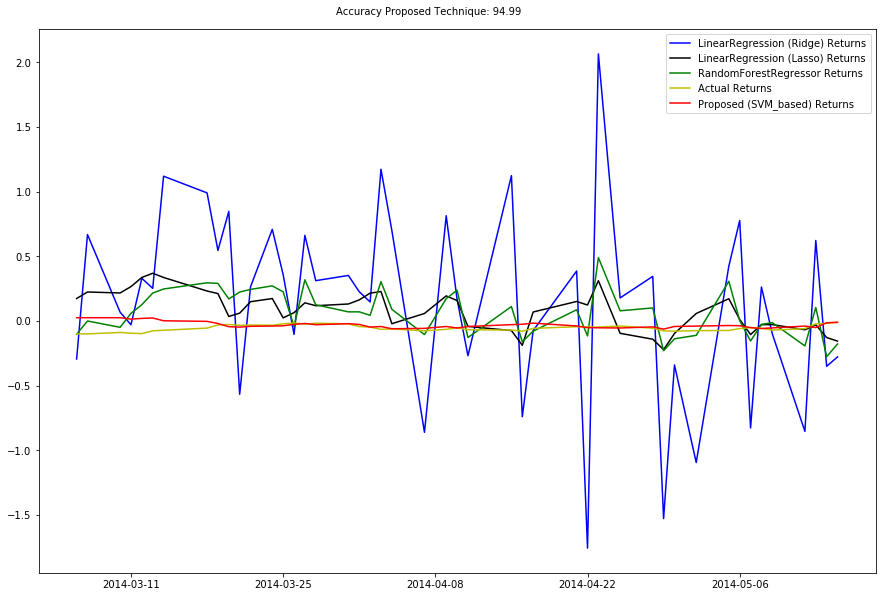

In [87]:
df['strategy_cu_return']=0
df['market_cu_return']=0
df.iloc[-p_data:,df.columns.get_loc('strategy_cu_return')] = np.nancumsum(df['str_ret'][-p_data:])
df.iloc[-p_data:,df.columns.get_loc('market_cu_return')] = np.nancumsum(df['Return'][-p_data:])
Sharpe = 100 - (df['strategy_cu_return'][-1]-df['market_cu_return'][-1])/np.nanstd(df['strategy_cu_return'][-p_data:])
df.dropna()

fig= plt.subplots(figsize = (15,10))
plt.plot(RIDGE_pred, color='b', label='LinearRegression (Ridge) Returns')
plt.plot(LASSO_pred, color='k', label='LinearRegression (Lasso) Returns')
#plt.plot(LOGREG_pred, color='m', label='LogisticRegression Returns')
plt.plot(RFRG_pred, color='g', label='RandomForestRegressor Returns')
plt.plot(df['market_cu_return'][-p_data:], color='y', label='Actual Returns')
plt.plot(df['strategy_cu_return'][-p_data:], color='r', label='Proposed (SVM_based) Returns')

plt.figtext(0.4,0.9, s='Accuracy Proposed Technique: %.2f'%Sharpe)
plt.legend(loc='best')
plt.show()